# Project: Wrangling and Analyze Data

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json

%matplotlib inline

## Data Gathering

In [2]:
# load twitter-archive-enhanced.csv dataset
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# download the tweet image prediction using the requests library
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [3]:
# load image-predictions.tsv dataset
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [32]:
# use tweepy library to query additional data via the Twitter API (tweet_json.txt)
import time

start = time.time()

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

missing_id = []

# write the queried data to tweet_json.txt
with open('tweet_json.txt', 'w') as file:
    for tweet_id in archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            missing_id.append(tweet_id)
                      
end = time.time()
print(end - start)

Rate limit reached. Sleeping for: 177
Rate limit reached. Sleeping for: 226


2269.1431515216827


It took about 38 minutes to query data via twitter api

In [4]:
# read tweet_json.txt file line by line and store in a pandas dataframe
with open('tweet_json.txt', 'r') as file:
    tweet_data = []
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id_str']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        tweet_data.append({'tweet_id':tweet_id, 
                           'retweet_count':retweet_count, 
                           'favorite_count':favorite_count
                          })
        
#create dataframe
extra_tweet_data = pd.DataFrame(tweet_data)        
        

## Assessing Data

In [5]:
#print out first five lines of archive dataframe
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
# get summary info of dataframe
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- columns such as tweet_id and timestamp have improper datatypes 

In [7]:
print(f'The twitter achive data has {archive.shape[0]} rows and {archive.shape[0]} columns')

The twitter achive data has 2356 rows and 2356 columns


In [8]:
# get number of missing values in each column
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

- It is advisable to drop the expanded_urls column since elements there are all unique values
- Most of the rows in in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
  and 'retweeted_status_timestamp' are missing so it is advisable to drop
- Through the visual assessment, it was noted that the name and dog stages have null values present in the columns, however, since the null values were recorded as 'None', the programmatic assessment did not account for the missing values

In [9]:
# check if there are duplicated rows in the dataset
archive.duplicated().sum()

0

In [10]:
# get descriptive statistics of dataset
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- Most rating_denominators, if not all, should be 10, so we need to confirm if this isn't a quality issue

In [11]:
#check value counts for rating_denominator
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [12]:
#check rows with rating_denominator less than 10
archive[archive['rating_denominator']<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [13]:
# create function to check the text column of specified row
def check_text(index_list):
    '''prints the text column of list of index'''
    for idx in index_list:
        print(f'{idx}: {archive["text"].iloc[idx]}')

In [14]:
text_idx = [313,516,2335]
check_text(text_idx)

313: @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
516: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
2335: This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


- checking through the text, it can be observed that the ratings for indexes 313, 516 and 2335 are all wrong. (313: 13/10, 516: none, 2335: 9/10) 

In [15]:
#check rows with rating_denominator greater than 10
archive[archive['rating_denominator']>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [16]:
#check rows with rating denominator greater than 10
deno_idx = archive[archive['rating_denominator']>10].index
check_text(deno_idx)

342: @docmisterio account started on 11/15/15
433: The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
784: RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902: Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120: Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228: Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254: Here's a brigade of puppers. All look very 

- **Right ratings:** 342: no rating, 1165: 13/10, 1202:11/10, 1662: 10/10, 784 and 1068: 14/10 
- 784 is a retweet of 1068

In [17]:
# check archive dataframe for respective index to store their tweet_id
idx = [313,342,516,784,1068,1165,1202,1662,2335]
tweet_ids = archive.loc[idx]['tweet_id'].tolist()
tweet_ids

[835246439529840640,
 832088576586297345,
 810984652412424192,
 775096608509886464,
 740373189193256964,
 722974582966214656,
 716439118184652801,
 682962037429899265,
 666287406224695296]

Tweet ids with their correct rating
-  835246439529840640: 13/10
-  832088576586297345: No Rating
-  810984652412424192: No Rating
-  775096608509886464: 14/10
-  740373189193256964: 14/10
-  722974582966214656: 13/10
-  716439118184652801: 11/10
-  682962037429899265: 10/10
-  666287406224695296: 9/10  

In [18]:
#check how elements in source column are written
archive['source'][0] 

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

- source still in html format

In [19]:
# get the top 20 unique values in the name column and their counts
archive['name'].value_counts().head(20) 

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

It can be observed that the misnamed names are the ones in lowercase

In [20]:
#assess rows with lowercase characters to check the misnamed names
archive[archive['name'].str.islower()]['name'].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [21]:
# get value counts of dog stages
stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    print(archive[stage].value_counts())
    print('-'*30)

None     2259
doggo      97
Name: doggo, dtype: int64
------------------------------
None       2346
floofer      10
Name: floofer, dtype: int64
------------------------------
None      2099
pupper     257
Name: pupper, dtype: int64
------------------------------
None     2326
puppo      30
Name: puppo, dtype: int64
------------------------------


In [22]:
# print first five rows of image_pred dataframe
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
print(f'The image_prediction data has {image_pred.shape[0]} rows and {image_pred.shape[1]} columns')

The image_prediction data has 2075 rows and 12 columns


In [24]:
# get 10 random rows in the image_pred dataframe
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1032,711652651650457602,https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg,1,llama,0.856789,False,Arabian_camel,0.098727,False,neck_brace,0.016377,False
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True
975,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1,Chihuahua,0.583780,True,Italian_greyhound,0.129683,True,toy_terrier,0.089153,True
1226,745057283344719872,https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg,2,Shetland_sheepdog,0.963985,True,collie,0.026206,True,Border_collie,0.004544,True
1098,720389942216527872,https://pbs.twimg.com/media/Cf9W1J-UMAErahM.jpg,1,Pembroke,0.873977,True,Cardigan,0.043339,True,Eskimo_dog,0.019197,True
1203,741438259667034112,https://pbs.twimg.com/media/CkoeKTPWYAAcWmo.jpg,1,Chesapeake_Bay_retriever,0.292675,True,redbone,0.197858,True,vizsla,0.150312,True
358,672614745925664768,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,1,starfish,0.712717,False,goldfish,0.258865,False,sea_cucumber,0.002015,False
1969,868622495443632128,https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg,1,Labrador_retriever,0.868107,True,Great_Pyrenees,0.060973,True,Saint_Bernard,0.033489,True
1739,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,Pomeranian,0.960199,True,Samoyed,0.023056,True,Maltese_dog,0.008945,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True


From here, we can see that the dog breeds in p1, p2 and p3 columns are not standardized. Some start with upper case while others are lower cased

In [25]:
# get summary information about dataset
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# check for missing values
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
# get the number of duplicated rows
image_pred.duplicated().sum()

0

In [28]:
# get descriptive statistics about dataset
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
# print first five lines of dataset
extra_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [30]:
# get summary information about dataset
extra_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [31]:
# get the number of duplicated rows
extra_tweet_data.duplicated().sum()

0

In [32]:
# check for missing values
extra_tweet_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [33]:
# get descriptive statistics about dataset
extra_tweet_data.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Quality issues

1. Some tweets are retweets (tweets with elements in columns in_reply_to_status_id and retweeted_status_id)

2. Erroneous datatypes(tweet_id(str),timestamp(datetime)) 

3. Missing values in columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

4. Nulls represented as None in *name*

5. Source column still in html format

6. Wrong names assigned to dogs (eg. a, an, the, very, quite). It can be observed that all improper names are in lower case apart from 'None'

7. Some ratings have wrong values

8. Dog breeds are not standardized


### Tidiness issues
1. Dog stages in `archive` table should be in a single column instead of four different columns

2. `extra_tweet_data` and `image_pred` should be part of `archive` table


## Cleaning Data

In [106]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_pred_clean = image_pred.copy()
extra_tweet_data_clean = extra_tweet_data.copy()

### Issue #1: `archive`: Some tweets are retweets

#### Define 
Drop all retweet rows in the dataset (rows that do not have NaN values in columns in_reply_to_status_id and retweeted_status_id )

#### Code

In [107]:
retweet_cols = ['retweeted_status_id','in_reply_to_status_id']
for col in retweet_cols:
    idx = archive_clean[archive_clean[col].notnull()].index
    archive_clean = archive_clean.drop(idx, axis=0)

#### Test

In [108]:
# confirm in_reply and retweeted_status columns have 0 non-null values
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: `archive`: Missing Values

#### Define
Drop all columns with missing values

#### Code

In [109]:
archive_clean = archive_clean.dropna(axis=1)

#### Test

In [110]:
# confirm there are no columns with missing values
archive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #3: Dog stages in archive table should be in a single column instead of four different columns

#### Define
Replace 'None' values in the dog stage columns with empty strings and concatenate dog stages 

#### Code

In [111]:
# replace None values in the dog stage columns with empty strings 
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in dog_stages:
    archive_clean[stage].replace('None', '', inplace=True)

In [112]:
archive_clean['dog_stage'] = archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo']

# rename dog stage with two dog stages as unknown
archive_clean.loc[archive_clean['dog_stage']=='doggopupper','dog_stage'] = 'unknown'
archive_clean.loc[archive_clean['dog_stage']=='doggopuppo','dog_stage'] = 'unknown'
archive_clean.loc[archive_clean['dog_stage']=='doggofloofer','dog_stage'] = 'unknown'

# drop individual dog stage columns
archive_clean = archive_clean.drop(dog_stages, axis=1)

In [113]:
# Replace empty strings in dog_stage column with 'unknown'
archive_clean['dog_stage'].replace('', 'unknown', inplace=True)

#### Test

In [114]:
archive_clean['dog_stage'].value_counts()

unknown    1772
pupper      221
doggo        72
puppo        23
floofer       9
Name: dog_stage, dtype: int64

In [115]:
archive_clean.tweet_id.duplicated().sum()

0

### Issue #4: `archive and image_pred` : Erroneous datatype (tweet_id(str), timestamp(datetime))

#### Define
Change datatype of tweet_id column from integer to string and timestamp column from string to datetime

#### Code

In [116]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)

#### Test

In [117]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_stage           2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 147.4+ KB


In [118]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #5: `extra_tweet_data` and `image_pred` should be part of `archive` table


#### Define
Merge the columns in extra_tweet_data and image_pred to the archive table, joining on tweet_id

#### Code

In [119]:
archive_clean = archive_clean.merge(extra_tweet_data_clean, on='tweet_id')
archive_clean = archive_clean.merge(image_pred_clean, on='tweet_id')

#### Test

In [120]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,unknown,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,unknown,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,unknown,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,unknown,8964,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,unknown,9774,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [121]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_stage           1971 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   int64              
 12  p1                  1971 non-null 

### Issue #6: `archive`: Source column in html format

#### Define
Extract the url using regex

#### Code

In [122]:
archive_clean['source'] = archive_clean.source.str.extract('"([a-z].+[a-z-.]+[a-z]" )', expand=True)

In [123]:
#create function to remove the quotation mark and whitespace at the end of each source
def strip(field):
    '''Removes whitespace and last character of any sentence'''
    field = field.strip()[:-1]
    return field
archive_clean['source'] = archive_clean['source'].apply(strip)

#### Test

In [124]:
archive_clean.source.value_counts()

http://twitter.com/download/iphone              1932
http://twitter.com                                28
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

In [125]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #7: Wrong Ratings

#### Define
 
 

Replace the wrong ratings with the correct ones
-  810984652412424192: No Rating
-  740373189193256964: 14/10
-  722974582966214656: 13/10
-  716439118184652801: 11/10
-  682962037429899265: 10/10
-  666287406224695296: 9/10  

#### Code

In [126]:
# convert tweet_ids in list from int to string
twt_ids = [f'{twt_id}' for twt_id in tweet_ids]
twt_ids

['835246439529840640',
 '832088576586297345',
 '810984652412424192',
 '775096608509886464',
 '740373189193256964',
 '722974582966214656',
 '716439118184652801',
 '682962037429899265',
 '666287406224695296']

In [127]:
# check if tweet_id is present in archive_clean
for twt_id in twt_ids:
    print(f'{twt_id}: {twt_id in archive_clean.tweet_id.unique()}')

835246439529840640: False
832088576586297345: False
810984652412424192: True
775096608509886464: False
740373189193256964: True
722974582966214656: True
716439118184652801: True
682962037429899265: True
666287406224695296: True


In [128]:
# change wrong ratings for tweet_ids still present in archive_clean
def correct_rating(tweet_id, rating_num,rating_denom):
    archive_clean.loc[archive_clean['tweet_id']==tweet_id, 'rating_numerator'] = rating_num
    archive_clean.loc[archive_clean['tweet_id']==tweet_id, 'rating_denominator'] = rating_denom

In [129]:
tweet_id_list = ['810984652412424192','740373189193256964','722974582966214656',
                 '716439118184652801','682962037429899265','666287406224695296']
rating_nums = [np.nan,14,13,12,11,9]
rating_denoms = [np.nan,10,10,10,10,10]
for (i, num, denom) in zip(tweet_id_list,rating_nums,rating_denoms):
    correct_rating(i, num, denom)
   

In [130]:
# drop row with missing ratings
archive_clean = archive_clean.dropna()

#### Test

In [131]:
archive_clean.query('tweet_id in @tweet_id_list')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
794,740373189193256964,2016-06-08 02:41:38+00:00,http://twitter.com/download/iphone,"After so many requests, this is Bretagne. She ...",14.0,10.0,None,unknown,9220,20648,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
884,722974582966214656,2016-04-21 02:25:47+00:00,http://twitter.com/download/iphone,Happy 4/20 from the squad! 13/10 for all https...,13.0,10.0,None,unknown,1764,4493,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
918,716439118184652801,2016-04-03 01:36:11+00:00,http://twitter.com/download/iphone,This is Bluebert. He just saw that both #Final...,12.0,10.0,Bluebert,unknown,247,2574,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1313,682962037429899265,2016-01-01 16:30:13+00:00,http://twitter.com/download/iphone,This is Darrel. He just robbed a 7/11 and is i...,11.0,10.0,Darrel,unknown,15043,26239,...,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
1950,666287406224695296,2015-11-16 16:11:11+00:00,http://twitter.com/download/iphone,This is an Albanian 3 1/2 legged Episcopalian...,9.0,10.0,an,unknown,71,152,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


### Issue #8: Wrong Dog Names

#### Define
Check for names with lowercase and replace with null values
 

#### Code

In [132]:
archive_clean.loc[archive_clean['name'].str.islower(), 'name'] = np.nan 

#### Test

In [133]:
archive_clean['name'].isnull().sum()

98

### Issue #9: `archive`: Nulls represented as None in *name* column

#### Define
Replace all None values with NaN

#### Code

In [134]:
archive_clean = archive_clean.replace('None', np.nan)

#### Test

In [135]:
archive_clean.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
rating_numerator        0
rating_denominator      0
name                  622
dog_stage               0
retweet_count           0
favorite_count          0
jpg_url                 0
img_num                 0
p1                      0
p1_conf                 0
p1_dog                  0
p2                      0
p2_conf                 0
p2_dog                  0
p3                      0
p3_conf                 0
p3_dog                  0
dtype: int64

### Issue #10:  Dog breeds are not standardized

#### Define
Create a function that returns the lower case of any value, then apply it to columns p1, p2, and p3

#### Code

In [136]:
def lower(field):
    '''Returns the lower case of each field'''
    field = field.lower()
    return field

pred = ['p1', 'p2', 'p3']
for p in pred:
    archive_clean[p] = archive_clean[p].apply(lower)

#### Test

In [137]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,unknown,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,unknown,6514,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,unknown,4328,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,unknown,8964,42908,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,unknown,9774,41048,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


## Storing Data

In [138]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

### Questions
- Is there a relationship between retweet count and favorite count?
- Which dog stage is the most common?
- Which dog stage has the highest retweet average?
- Which dog stage has the highest favorite count average?
- Which dog stage has the highest rating average?


### General characteristics of the dataset

In [139]:
archive_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1.970000e+03,1.970000e+03
mean,12.211168,10.456853,2785.022843,8950.640609,1.202030,0.594417,1.346347e-01,6.018299e-02
std,41.633740,6.790369,4698.786673,12270.725531,0.559144,0.272124,1.010543e-01,5.094862e-02
min,0.000000,10.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,628.250000,1991.000000,1.000000,0.363008,5.351907e-02,1.606823e-02
50%,11.000000,10.000000,1367.000000,4145.500000,1.000000,0.587635,1.173995e-01,4.945765e-02
75%,12.000000,10.000000,3239.500000,11406.750000,1.000000,0.847216,1.955692e-01,9.155482e-02
max,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [140]:
# function to set the labels for the x-axis, y-axis and the title of the plots
def label(x_label,y_label,title):
    '''Sets the labels for the x-axis, y-axis and the title of the plots'''
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    

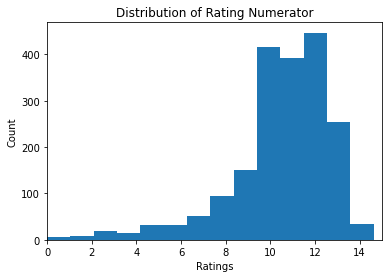

In [141]:
plt.hist(data=archive_clean, x='rating_numerator', bins=1700)
plt.xlim(0,15)
label('Ratings', 'Count', 'Distribution of Rating Numerator');

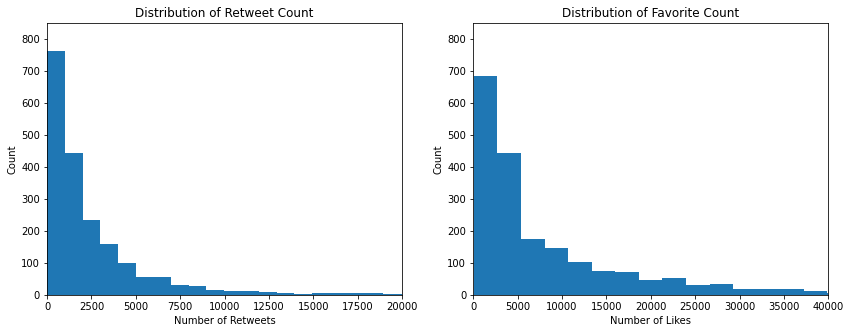

In [142]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(data=archive_clean, x='retweet_count', bins=80)
label('Number of Retweets', 'Count', 'Distribution of Retweet Count')
plt.xlim(0,20000)
plt.ylim(0,850)

plt.subplot(1,2,2)
plt.hist(data=archive_clean, x='favorite_count', bins=50)
label('Number of Likes', 'Count', 'Distribution of Favorite Count')
plt.xlim(0,40000)
plt.ylim(0,850);

From the above analysis and visualizations, we can observe some of the general charcteristics of the dataset and make the following insights.
- The favorite count is generally always more that the retweet count.
- The rating denominator is almost always 10 except for in very few occurences.
- Most of the ratings in the rating numerator falls between 10 and 13

### Is there a relationship between retweet count and favorite count?

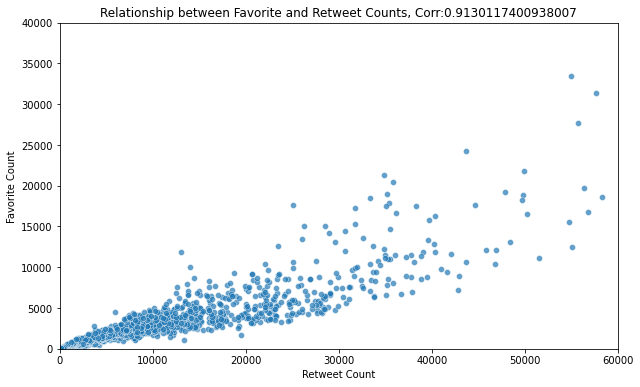

In [143]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=archive_clean, x='favorite_count', y='retweet_count', alpha=0.7)
corr = archive_clean.corr()['retweet_count']['favorite_count']
label('Retweet Count','Favorite Count',f'Relationship between Favorite and Retweet Counts, Corr:{corr}')
plt.xlim(0,60000)
plt.ylim(0,40000);

From the scatterplot, we can see that there is definitely a relationship between retweet counts and favourite count. The plot shows a very high positive correlation of 0.913, that is dogs with more likes generally get retweeted more.

### Which dog stage is the most common?

In [144]:
# create dataframe with only known dog stages 
dog_stages = archive_clean[archive_clean['dog_stage'] != 'unknown']

pupper     201
doggo       63
puppo       22
floofer      7
Name: dog_stage, dtype: int64

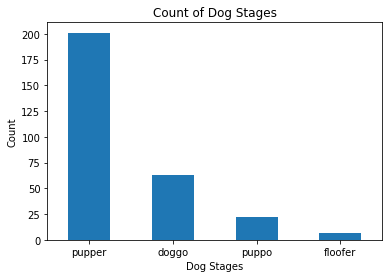

In [150]:
dog_stages['dog_stage'].value_counts().plot(kind='bar')
label('Dog Stages', 'Count','Count of Dog Stages')
plt.xticks(rotation=0);
plt.savefig('a')
dog_stages['dog_stage'].value_counts()

The most common dog stage is Pupper, while the least common is Floofer.

### Which dog stage has the highest retweet count average?

dog_stage
doggo      7125.698413
floofer    4968.714286
pupper     2382.502488
puppo      6473.954545
Name: retweet_count, dtype: float64

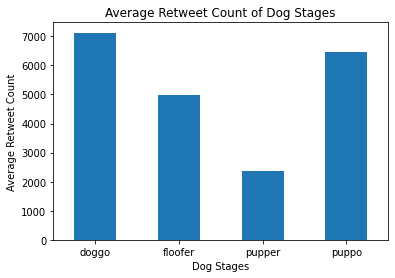

In [147]:
dog_stages.groupby('dog_stage').mean()['retweet_count'].plot(kind='bar')
label('Dog Stages', 'Average Retweet Count','Average Retweet Count of Dog Stages')
plt.xticks(rotation=0);

dog_stages.groupby('dog_stage').mean()['retweet_count']

From the bar plot, Doggo stage had the highest retweet count, while pupper had the lowest retweet count

### Which dog stage has the highest favorite count average?

dog_stage
doggo      19356.380952
floofer    13206.000000
pupper      7250.527363
puppo      21582.090909
Name: favorite_count, dtype: float64

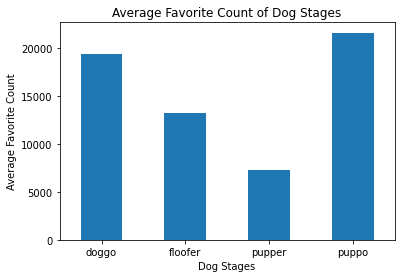

In [148]:
dog_stages.groupby('dog_stage').mean()['favorite_count'].plot(kind='bar')
label('Dog Stages','Average Favorite Count','Average Favorite Count of Dog Stages')
plt.xticks(rotation=0);

dog_stages.groupby('dog_stage').mean()['favorite_count']

From the bar plot, Puppo stage has the highest favorite count, while pupper had the lowest favorite count

### Which dog stage has the highest rating average?

dog_stage
doggo      11.888889
floofer    12.000000
pupper     10.716418
puppo      12.000000
Name: rating_numerator, dtype: float64

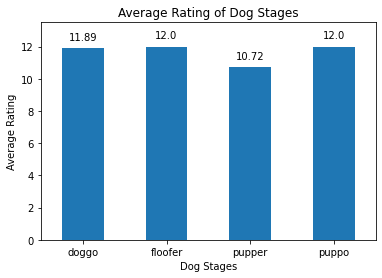

In [151]:
mean_rating = dog_stages.groupby('dog_stage').mean()['rating_numerator']
mean_rating.plot(kind='bar')
label('Dog Stages','Average Rating','Average Rating of Dog Stages')
plt.xticks(rotation=0)
plt.ylim(0,13.5)

# print text on bars
for i in range(0, len(mean_rating)):
    count= mean_rating[i]
    pct_string = np.round(count, 2)
    plt.text(i, count+1, pct_string, ha='center', va='top')

mean_rating

The puppo and floofer stage had the highest ratings of 12, while the puppers had the lowest ratings